Optimal A* Schedule: [] Time: inf
Greedy Schedule: ['B', 'A', 'C', 'D', 'E'] Time: 15


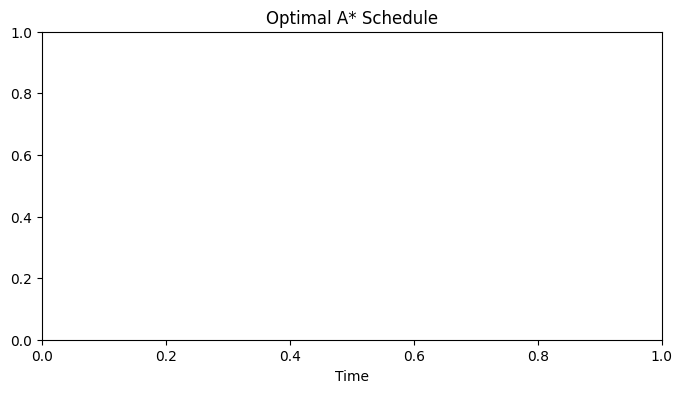

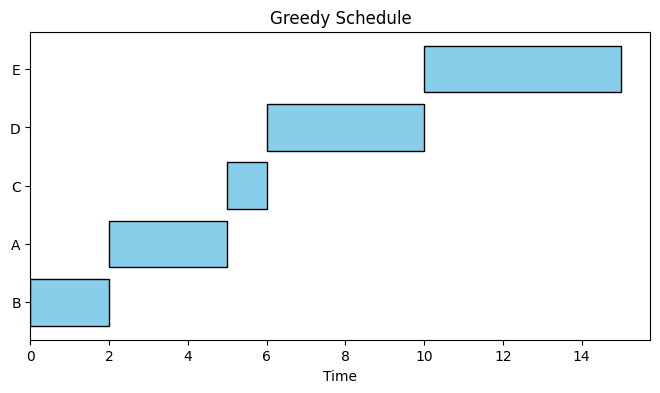

In [2]:
import heapq
from collections import deque
import matplotlib.pyplot as plt

class TaskScheduler:
    def __init__(self, tasks, dependencies):
        self.tasks = tasks  # Dictionary {task: duration}
        self.dependencies = dependencies  # List of (prerequisite, dependent)
        self.graph, self.in_degree = self.build_graph()

    def build_graph(self):
        graph = {task: [] for task in self.tasks}
        in_degree = {task: 0 for task in self.tasks}
        
        for pre, dep in self.dependencies:
            graph[pre].append(dep)
            in_degree[dep] += 1
        
        return graph, in_degree
    
    def heuristic(self, remaining_tasks):
        """ Heuristic function: Estimate remaining duration by summing longest path."""
        return sum(self.tasks[t] for t in remaining_tasks)
    
    def a_star_schedule(self):
        """ A* Search to find the optimal task schedule. """
        open_list = []  # Priority queue (min-heap)
        heapq.heappush(open_list, (0, 0, [], set()))  # (f(n), time taken, completed tasks, remaining tasks)
        
        best_time = float('inf')
        best_schedule = []
        
        while open_list:
            f, g, completed, remaining = heapq.heappop(open_list)
            
            if len(completed) == len(self.tasks):
                if g < best_time:
                    best_time, best_schedule = g, completed
                continue
            
            # Get available tasks (in-degree = 0)
            available = [t for t in self.tasks if t not in completed and self.in_degree[t] == 0]
            
            for task in available:
                new_completed = completed + [task]
                new_remaining = remaining | {task}
                new_g = g + self.tasks[task]
                new_h = self.heuristic(set(self.tasks) - new_remaining)
                new_f = new_g + new_h
                
                heapq.heappush(open_list, (new_f, new_g, new_completed, new_remaining))
                
        return best_schedule, best_time
    
    def greedy_schedule(self):
        """ Greedy algorithm: Always pick the shortest available task. """
        available = deque([t for t in self.tasks if self.in_degree[t] == 0])
        schedule = []
        time_taken = 0
        
        while available:
            task = min(available, key=lambda t: self.tasks[t])  # Shortest task first
            available.remove(task)
            schedule.append(task)
            time_taken += self.tasks[task]
            
            for dep in self.graph[task]:
                self.in_degree[dep] -= 1
                if self.in_degree[dep] == 0:
                    available.append(dep)
                    
        return schedule, time_taken

    def plot_schedule(self, schedule, title):
        """ Plot the schedule as a Gantt chart. """
        start_times = {}
        current_time = 0
        
        for task in schedule:
            start_times[task] = current_time
            current_time += self.tasks[task]
        
        fig, ax = plt.subplots(figsize=(8, 4))
        for task, start_time in start_times.items():
            ax.barh(task, self.tasks[task], left=start_time, color='skyblue', edgecolor='black')
        
        ax.set_xlabel("Time")
        ax.set_title(title)
        plt.show()


# Example Usage
tasks = {
    'A': 3, 'B': 2, 'C': 1, 'D': 4, 'E': 5
}
dependencies = [('A', 'C'), ('A', 'D'), ('B', 'D'), ('C', 'E'), ('D', 'E')]

scheduler = TaskScheduler(tasks, dependencies)
optimal_schedule, optimal_time = scheduler.a_star_schedule()
greedy_schedule, greedy_time = scheduler.greedy_schedule()

print("Optimal A* Schedule:", optimal_schedule, "Time:", optimal_time)
print("Greedy Schedule:", greedy_schedule, "Time:", greedy_time)

scheduler.plot_schedule(optimal_schedule, "Optimal A* Schedule")
scheduler.plot_schedule(greedy_schedule, "Greedy Schedule")